In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Steps
- index: drop index column as it is not needed
- date: drop as we already have day, month and year information
- season: convert to dummy variables
- year: yr is already binary
- mnth: convert to dummy variables
- holiday: holiday is binary
- weekday: calculate whether weekend or not
- workingday: is already binary for working as 1
- weathersit: weathersit to dummary variables

### Numerical Variables

- temp
- atemp
- hum
- windspeed
- casual
- registered-# cnt (target variable)

In [4]:
data.shape

(730, 16)

In [5]:
# index: drop index column as it is not needed
# date: drop as we already have day, month and year information
# casual and registered: target variable is directly drived from these variables
data = data.drop(['instant','dteday','casual','registered'],axis=1)

In [6]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Conclusion: There are no Null Values

# Univariate Analysis

In [8]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [9]:
data.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [10]:
data.temp.mean()

20.31925921698629

### Comment: Temperature is reasonable

In [11]:
data.windspeed.mean()

12.763619654657532

### Comment: Windspeed looks ok

### Let's looks at some binary variables

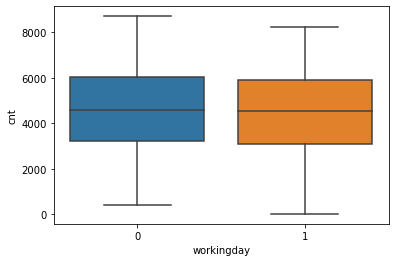

In [12]:
sns.boxplot(x='workingday', y='cnt', data = data)
plt.show()

### Comment
- Workingday does not look significant variable

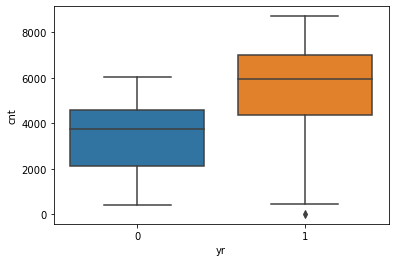

In [13]:
sns.boxplot(x='yr', y='cnt', data = data)
plt.show()

### Comments
- Year represented by 1 is significant

# Bivariate Analysis

### Let's look at the heatmap

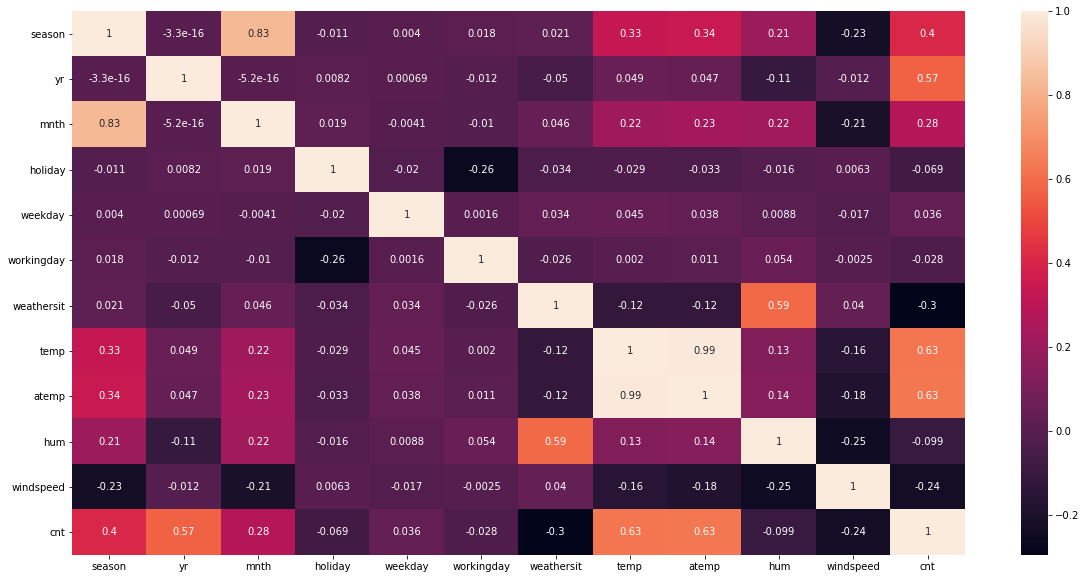

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Let's look at the pairplot

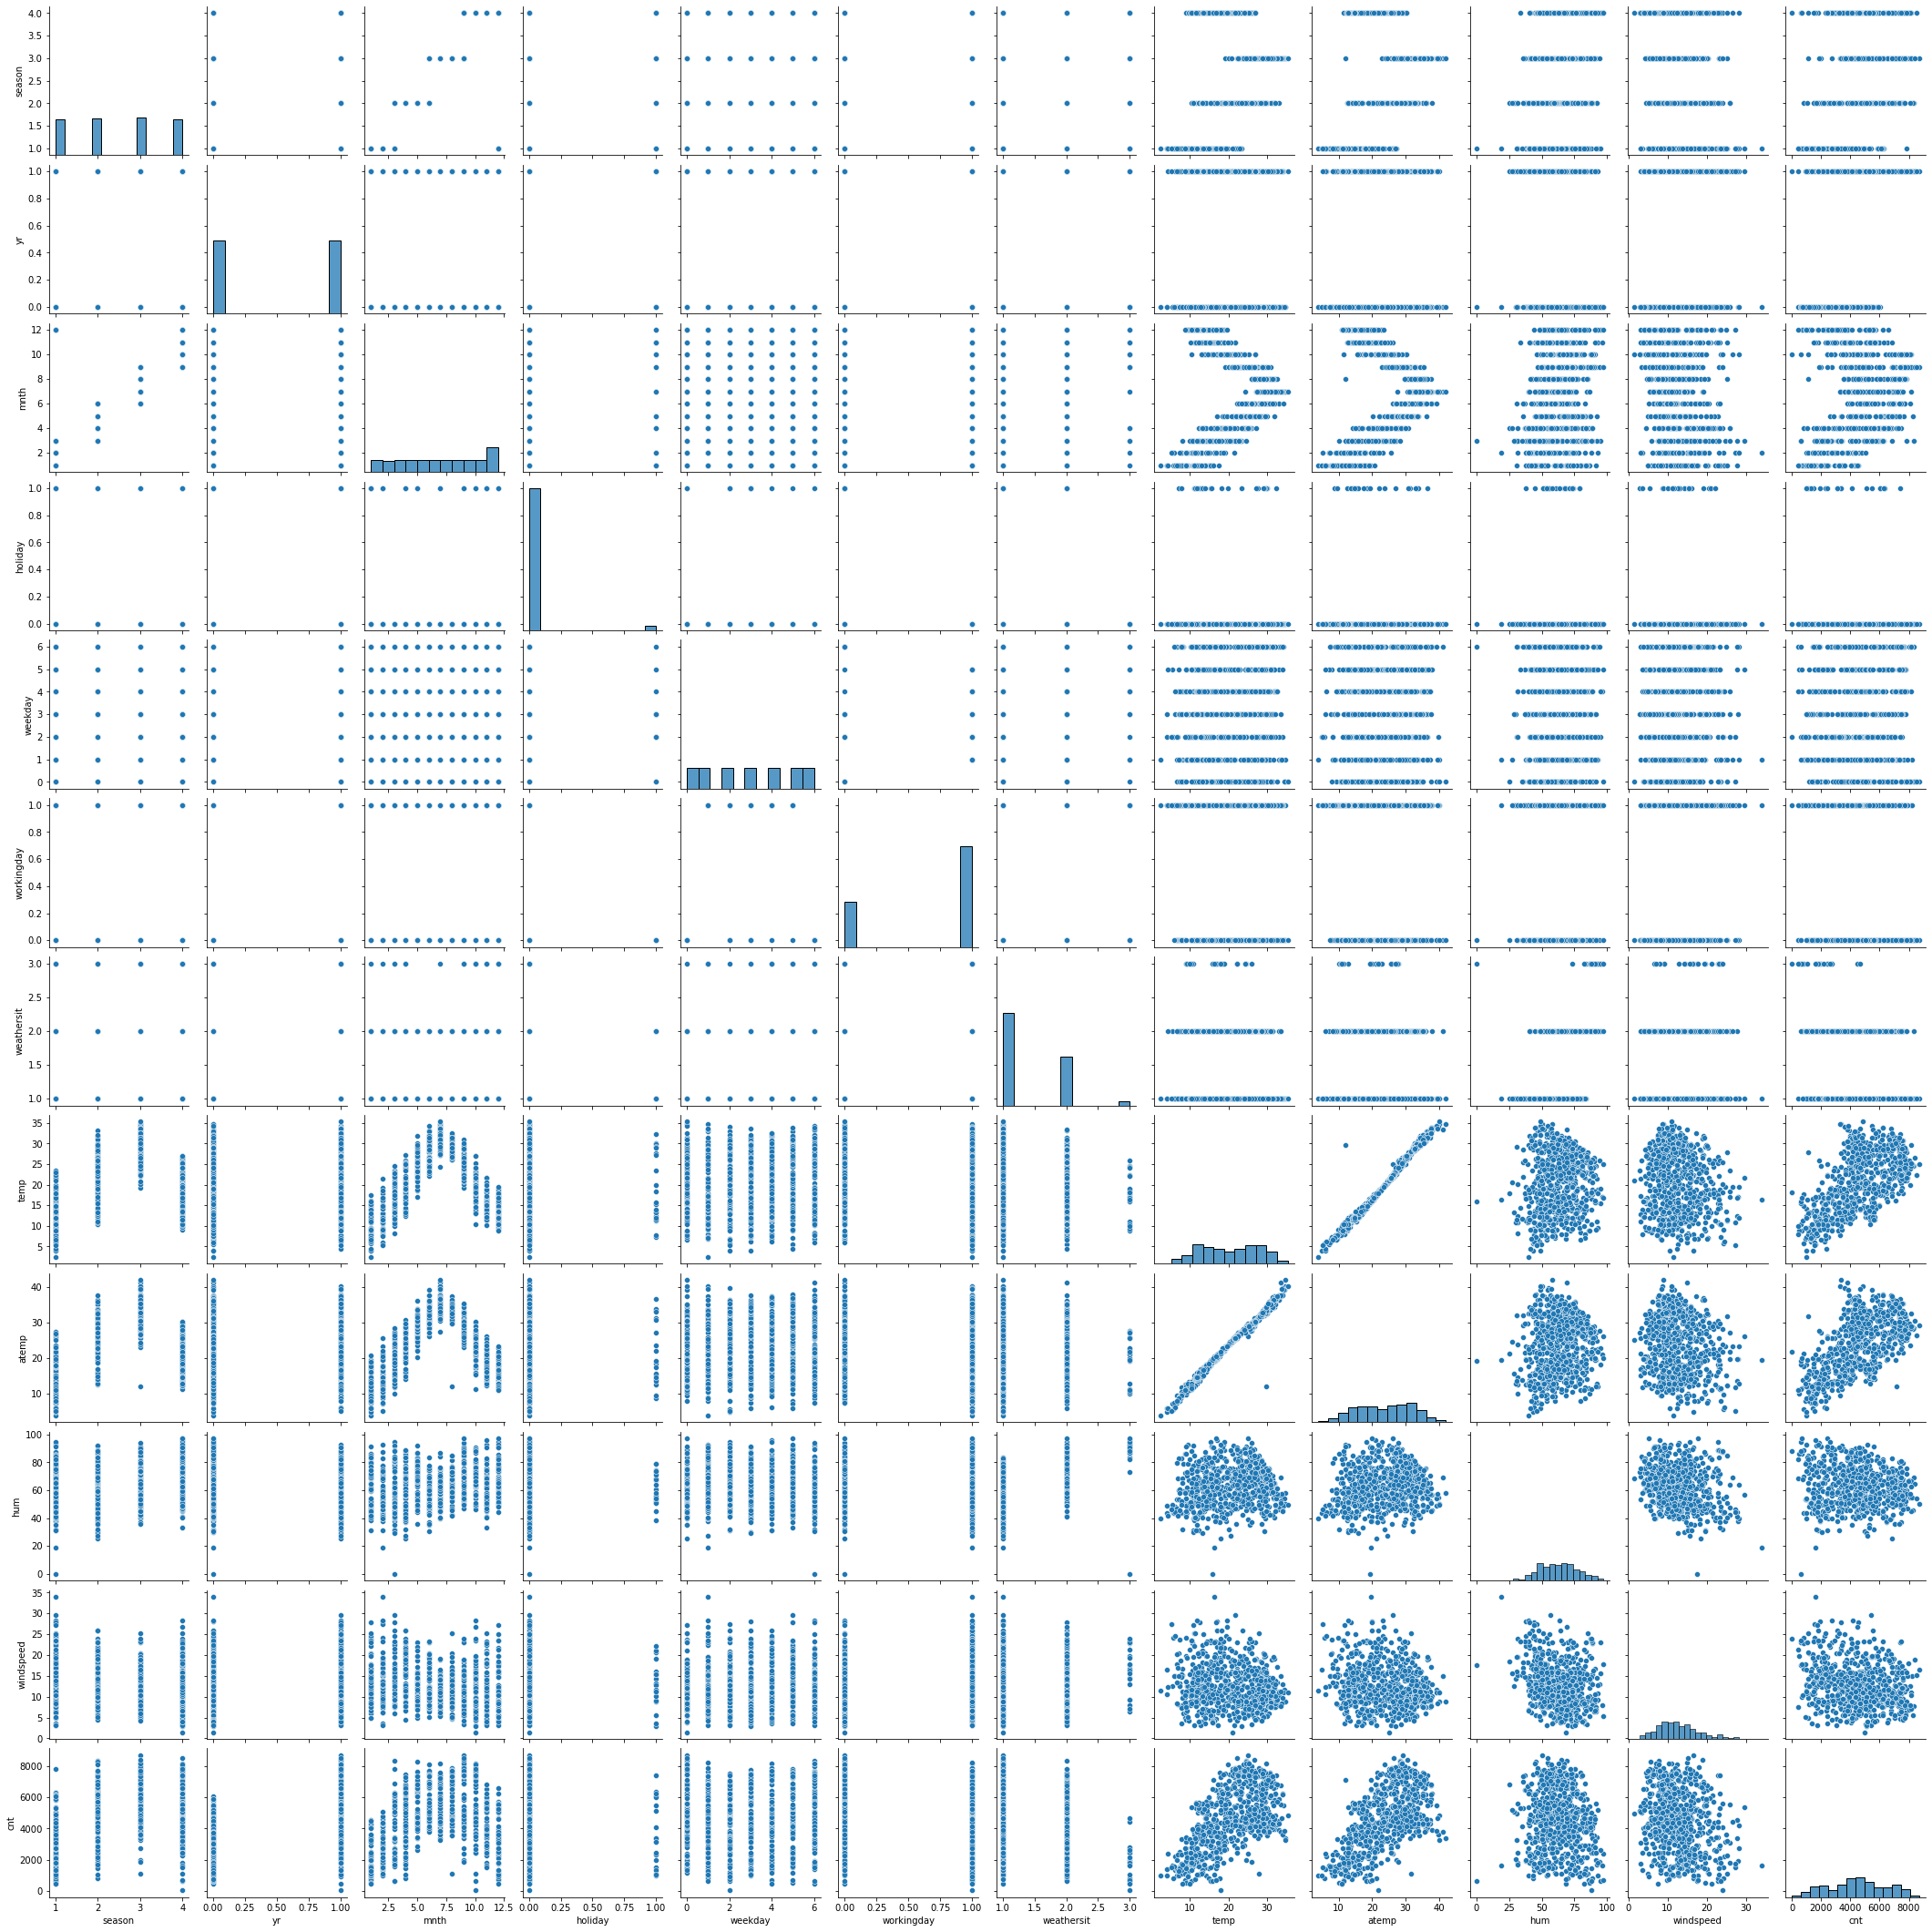

In [15]:
sns.pairplot(data)
plt.show()

### Some of the variables do show linear relationship with the target variable

### Converting categorical variables to dummy variables

In [16]:
# season: convert to dummy variables
# mnth: convert to dummy variables
# weathersit: weathersit to dummary variables

status_1 = pd.get_dummies(data['season'], drop_first=True)
status_1.rename(columns = {2:'summer', 3:'fall',4:'winter'}, inplace = True)

status_2 = pd.get_dummies(data['mnth'], drop_first=True)

status_3 = pd.get_dummies(data['weathersit'], drop_first=True)
status_3.rename(columns = {2:'weather2', 3:'weather3'}, inplace = True)

#status_1.head()
#status_2.head()
#status_3.head()

data = pd.concat([data,status_1,status_2,status_3], axis=1)

In [17]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,5,6,7,8,9,10,11,12,weather2,weather3
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [18]:
pd.set_option('display.max_columns', None)

In [19]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,2,3,4,5,6,7,8,9,10,11,12,weather2,weather3
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Drop previous columns
data = data.drop(['season','mnth','weathersit'], axis=1)

In [21]:
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,2,3,4,5,6,7,8,9,10,11,12,weather2,weather3
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
data.shape

(730, 25)

### First fitting the model using RFE approach to find top 15 variables

In [23]:
# Creating test and train dataset
df_train, df_test = train_test_split(data,train_size=0.7,random_state=100)

In [24]:
# Rescaling numerical variables in train dataset using mix_max method

scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,2,3,4,5,6,7,8,9,10,11,12,weather2,weather3
576,1,0,3,1,0.815169,0.766351,0.725633,0.264686,7216,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,1,1,0.245101,0.200348,0.498067,0.663106,1796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0,0.395666,0.391735,0.504508,0.188475,4220,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0,0.345824,0.318819,0.751824,0.380981,1683,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [25]:
# Creating y_train and X_train from df_train data
y_train = df_train.pop('cnt')
X_train = df_train

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit = (X_train,y_train)

In [29]:
rfe = RFE(lm,15)

In [30]:
rfe = rfe.fit(X_train,y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 10),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 (2, False, 5),
 (3, True, 1),
 (4, False, 3),
 (5, True, 1),
 (6, False, 2),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 8),
 (12, False, 9),
 ('weather2', True, 1),
 ('weather3', True, 1)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index([       'yr',   'holiday',      'temp',       'hum', 'windspeed',
          'summer',      'fall',    'winter',           3,           5,
                 8,           9,          10,  'weather2',  'weather3'],
      dtype='object')

In [33]:
# Model fitting
X_train_new = X_train[col]

In [34]:
X_train_new_fit = sm.add_constant(X_train_new)

In [35]:
lm = sm.OLS(y_train,X_train_new_fit).fit()

In [36]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.00e-188
Time:                        23:28:06   Log-Likelihood:                -4111.8
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2085.3413    238.111      8.758      0.000    1617.506    2553.177
yr          2002.9993     70.397     28.453      0.000    1864.685    2141.313
holiday     -772.7193    221.596     -3.487      0.001   -1208.106    -337.333
temp        4232.3082    299.760     14.119      0.000    3643.347    4821.269
hum        -1561.1396    329.769     -4.734      0.000   -2209.062    -913.217
windspeed  -1598.1547    223.134     -7.162      0.000   -2036.563   -1159.746
summer      1013.4148    134.646      7.527      0.000     748.865    1277.965
fall         369.2265    199.891      1.847      0.065     -23.514     761.967
winter      1329.6627    123.102     10.801      0.000    1087.795    1571.530
3            280.6801    127.787      2.196      0.029      29.606     531.754
5            245.1201    155.081      1.581      0.115     -59.580     549.820
8            442.4693    151.917      2.913      0.004     143.985     740.953
9           1048.8336    150.187      6.984      0.000     753.750    1343.918
10           354.1236    153.042      2.314      0.021      53.431     654.816
weather2    -470.8463     90.777     -5.187      0.000    -649.203    -292.490
weather3   -2111.0296    229.839     -9.185      0.000   -2562.612   -1659.447
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Calculating VIF again
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,temp,24.63
3,hum,15.53
6,fall,8.80
4,windspeed,3.81
5,summer,3.75
7,winter,3.11
13,weather2,2.15
0,yr,2.05
10,8,1.85
9,5,1.68


### Shortlisting variables using manual approach

In [38]:
X_train_new.head()

,yr,holiday,temp,hum,windspeed,summer,fall,winter,3,5,8,9,10,weather2,weather3
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1,0


In [39]:
# Column 5 has very high p value
X_train_new = X_train_new.drop(5, axis=1)
X_train_new.head()

,yr,holiday,temp,hum,windspeed,summer,fall,winter,3,8,9,10,weather2,weather3
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1,0


In [40]:
# refitting the model
X_train_new_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_new_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          2.46e-189
Time:                        23:28:06   Log-Likelihood:                -4113.1
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     495   BIC:                             8320.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2040.6178    236.782      8.618      0.000    1575.397    2505.839
yr          1997.1983     70.407     28.366      0.000    1858.864    2135.532
holiday     -782.6080    221.842     -3.528      0.000   -1218.477    -346.739
temp        4315.8083    295.514     14.604      0.000    3735.192    4896.425
hum        -1494.1488    327.529     -4.562      0.000   -2137.666    -850.631
windspeed  -1614.8506    223.221     -7.234      0.000   -2053.427   -1176.274
summer      1064.8131    130.858      8.137      0.000     807.707    1321.919
fall         313.9024    197.100      1.593      0.112     -73.353     701.158
winter      1305.1579    122.306     10.671      0.000    1064.854    1545.461
3            242.7992    125.710      1.931      0.054      -4.191     489.790
8            438.5688    152.127      2.883      0.004     139.674     737.463
9           1044.6600    150.391      6.946      0.000     749.177    1340.143
10           341.4833    153.064      2.231      0.026      40.749     642.218
weather2    -472.5938     90.907     -5.199      0.000    -651.206    -293.982
weather3   -2128.7686    229.912     -9.259      0.000   -2580.493   -1677.045
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# calculating VIF again
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,temp,24.02
3,hum,15.48
6,fall,8.53
4,windspeed,3.73
5,summer,3.53
7,winter,3.05
12,weather2,2.15
0,yr,2.03
9,8,1.85
11,10,1.63


In [42]:
# Column fall has high p value and VIF
X_train_new = X_train_new.drop('fall', axis=1)
X_train_new.head()

,yr,holiday,temp,hum,windspeed,summer,winter,3,8,9,10,weather2,weather3
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [43]:
# refitting the model
X_train_new_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_new_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          5.94e-190
Time:                        23:28:07   Log-Likelihood:                -4114.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2043.6358    237.140      8.618      0.000    1577.712    2509.559
yr          1987.7661     70.266     28.289      0.000    1849.710    2125.822
holiday     -797.1040    221.999     -3.591      0.000   -1233.278    -360.930
temp        4668.8499    195.721     23.855      0.000    4284.305    5053.395
hum        -1569.3407    324.609     -4.835      0.000   -2207.120    -931.562
windspeed  -1645.5402    222.731     -7.388      0.000   -2083.154   -1207.927
summer       920.3424     94.459      9.743      0.000     734.754    1105.931
winter      1210.6219    107.101     11.304      0.000    1000.193    1421.050
3            202.4591    123.322      1.642      0.101     -39.839     444.757
8            525.7640    142.153      3.699      0.000     246.468     805.060
9           1123.4087    142.250      7.897      0.000     843.923    1402.895
10           308.6384    151.903      2.032      0.043      10.186     607.090
weather2    -462.5489     90.829     -5.093      0.000    -641.005    -284.093
weather3   -2086.7428    228.746     -9.123      0.000   -2536.174   -1637.312
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# calculating VIF again
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
3,hum,14.73
2,temp,10.01
4,windspeed,3.70
6,winter,2.32
11,weather2,2.14
0,yr,2.02
5,summer,1.84
8,8,1.61
10,10,1.60
9,9,1.34


In [45]:
# Column 3 has high p value
X_train_new = X_train_new.drop(3, axis=1)
X_train_new.head()

,yr,holiday,temp,hum,windspeed,summer,winter,8,9,10,weather2,weather3
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,1,0


In [46]:
# refitting the model
X_train_new_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_new_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.49e-190
Time:                        23:28:07   Log-Likelihood:                -4115.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     497   BIC:                             8313.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2099.6201    235.076      8.932      0.000    1637.756    2561.485
yr          1989.2249     70.380     28.264      0.000    1850.945    2127.505
holiday     -818.0152    222.011     -3.685      0.000   -1254.210    -381.820
temp        4620.8839    193.858     23.836      0.000    4240.002    5001.766
hum        -1580.1777    325.095     -4.861      0.000   -2218.908    -941.447
windspeed  -1623.9671    222.722     -7.291      0.000   -2061.561   -1186.374
summer       919.6382     94.619      9.719      0.000     733.736    1105.540
winter      1176.0936    105.195     11.180      0.000     969.412    1382.775
8            508.8300    142.020      3.583      0.000     229.797     787.864
9           1110.0115    142.257      7.803      0.000     830.512    1389.511
10           311.3564    152.152      2.046      0.041      12.415     610.298
weather2    -461.5896     90.981     -5.073      0.000    -640.345    -282.834
weather3   -2072.7786    228.978     -9.052      0.000   -2522.662   -1622.895
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# calculating VIF again
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,winter,2.25
10,weather2,2.13
0,yr,2.02
5,summer,1.84
7,8,1.60
9,10,1.60
8,9,1.34


In [48]:
# Since all the p values are now below 5, we remove hum variable as it has VIF above 10 
X_train_new = X_train_new.drop('hum', axis=1)
X_train_new.head()

,yr,holiday,temp,windspeed,summer,winter,8,9,10,weather2,weather3
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0,1,0
111,0,0,0.345824,0.380981,1,0,0,0,0,1,0


In [49]:
# refitting the model
X_train_new_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_new_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          9.45e-187
Time:                        23:28:07   Log-Likelihood:                -4127.6
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     498   BIC:                             8330.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1191.8505    145.972      8.165      0.000     905.054    1478.647
yr          2024.3882     71.580     28.281      0.000    1883.752    2165.025
holiday     -830.8189    226.982     -3.660      0.000   -1276.779    -384.858
temp        4431.8945    194.185     22.823      0.000    4050.371    4813.418
windspeed  -1318.3389    218.462     -6.035      0.000   -1747.560    -889.118
summer       892.0580     96.570      9.237      0.000     702.323    1081.793
winter      1100.4061    106.373     10.345      0.000     891.410    1309.402
8            494.5367    145.179      3.406      0.001     209.297     779.776
9           1049.7601    144.900      7.245      0.000     765.070    1334.450
10           270.4855    155.333      1.741      0.082     -34.703     575.674
weather2    -712.4397     76.611     -9.299      0.000    -862.961    -561.919
weather3   -2494.1172    216.697    -11.510      0.000   -2919.869   -2068.365
==============================================================================
Omnibus:                       61.862   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.356
Skew:                          -0.653   Prob(JB):                     2.02e-31
Kurtosis:                       5.224   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# calculating VIF again
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,winter,1.93
4,summer,1.83
6,8,1.59
8,10,1.59
9,weather2,1.49
7,9,1.34
10,weather3,1.10


In [51]:
# Column 10 is showing very high p value
X_train_new = X_train_new.drop(10, axis=1)
X_train_new.head()

,yr,holiday,temp,windspeed,summer,winter,8,9,weather2,weather3
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1,0
111,0,0,0.345824,0.380981,1,0,0,0,1,0


In [52]:
# refitting the model
X_train_new_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_new_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          2.62e-187
Time:                        23:28:08   Log-Likelihood:                -4129.2
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     499   BIC:                             8327.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1158.2383    144.984      7.989      0.000     873.383    1443.093
yr          2021.4376     71.706     28.191      0.000    1880.555    2162.320
holiday     -839.4338    227.390     -3.692      0.000   -1286.193    -392.674
temp        4496.6820    190.975     23.546      0.000    4121.467    4871.897
windspeed  -1301.2697    218.686     -5.950      0.000   -1730.929    -871.611
summer       879.7754     96.508      9.116      0.000     690.163    1069.388
winter      1191.5878     92.781     12.843      0.000    1009.299    1373.877
8            470.5913    144.821      3.249      0.001     186.058     755.124
9           1010.8056    143.454      7.046      0.000     728.958    1292.653
weather2    -705.2619     76.656     -9.200      0.000    -855.870    -554.654
weather3   -2449.8560    215.638    -11.361      0.000   -2873.527   -2026.185
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# calculating VIF again
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer,1.82
6,8,1.58
8,weather2,1.49
5,winter,1.48
7,9,1.31
9,weather3,1.08
1,holiday,1.04


### Comments
- This model looks good as the R square value is above 80% and adjusted R square is also close to this. 
- Prob of F statistic is also very low signifying that the model fit is not by chance
- p values are close to 0 and VIF is lower than or around 5 for all variables

In [54]:
# Residual analysis
y_train_pred = lr_model.predict(X_train_new_sm)

<AxesSubplot:ylabel='Density'>

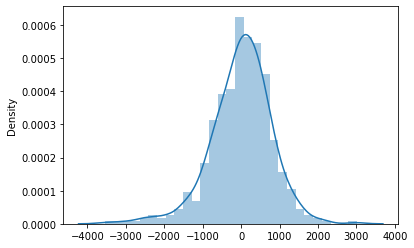

In [55]:
res = y_train - y_train_pred
sns.distplot(res)

### Comment: The residual values are showing normal distribution as required.

# Fitting the Model to Test Data Set

In [56]:
# scaling the num_vars in test data set
# creating y_train and X_train from df_train data
num_vars = ['temp','atemp','hum','windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,2,3,4,5,6,7,8,9,10,11,12,weather2,weather3
184,0,1,3,0,0.831783,0.769660,0.657364,0.084219,6043,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,4,1,0.901354,0.842587,0.610133,0.153728,6211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
299,0,0,6,0,0.511964,0.496145,0.837699,0.334206,2659,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
221,0,0,5,1,0.881625,0.795343,0.437098,0.339570,4780,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
152,0,0,6,0,0.817246,0.741471,0.314298,0.537414,4968,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
X_test_sm = sm.add_constant(X_test)

In [59]:
X_test_sm.head()

,const,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,2,3,4,5,6,7,8,9,10,11,12,weather2,weather3
184,1.0,0,1,3,0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,4,1,0.901354,0.842587,0.610133,0.153728,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
299,1.0,0,0,6,0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,5,1,0.881625,0.795343,0.437098,0.339570,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
152,1.0,0,0,6,0,0.817246,0.741471,0.314298,0.537414,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [60]:
# dropping columns from test dataset
X_test_sm = X_test_sm.drop(['weekday','workingday','atemp','hum','fall',2,3,4,5,6,7,10,11,12],axis=1)

In [61]:
X_test_sm.shape

(220, 11)

In [62]:
# Comparing with the train model
X_train_new_sm.shape

(510, 11)

In [63]:
y_test_pred = lr_model.predict(X_test_sm)

In [64]:
# calculating R2 score for the y_test_pred
r2_test = r2_score(y_true=y_test,y_pred=y_test_pred)

In [65]:
r2_test

0.7935224695104377

In [69]:
# Adjusted R2 score, with N=220, p = 10
1-(1-r2_test)*(220-1)/(220-10-1)

0.7836431618315113

### Comment: The R2 score is close to the adjusted R2 score which signifies that the model is not fitted by chance

In [66]:
# calculating r2 score of trian data set for comparison
r2_train = r2_score(y_true=y_train,y_pred=y_train_pred)

In [67]:
r2_train

0.8338606244120907

In [70]:
# Adjusted R2 score for train model, with N=510, p = 10
1-(1-r2_train)*(510-1)/(510-10-1)

0.8305311780075234

### Model Evaluation: Since the R2 and adjusted R2 score of the test model is close to the R2 score of train model, the model looks good to go.